<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/01_l1_l2_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Imports
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# Step 2: Load and Prepare Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[..., tf.newaxis].astype("float32") / 255.0
x_test = x_test[..., tf.newaxis].astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [4]:
# Step 3: Build Baseline Model (No Regularization)
def build_model_without_regularization():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Step 4: Build Model with L2 Regularization
def build_model_with_l2():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Step 5: Train Both Models
model_no_reg = build_model_without_regularization()
history_no_reg = model_no_reg.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=64, verbose=0)

model_l2 = build_model_with_l2()
history_l2 = model_l2.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=64, verbose=0)

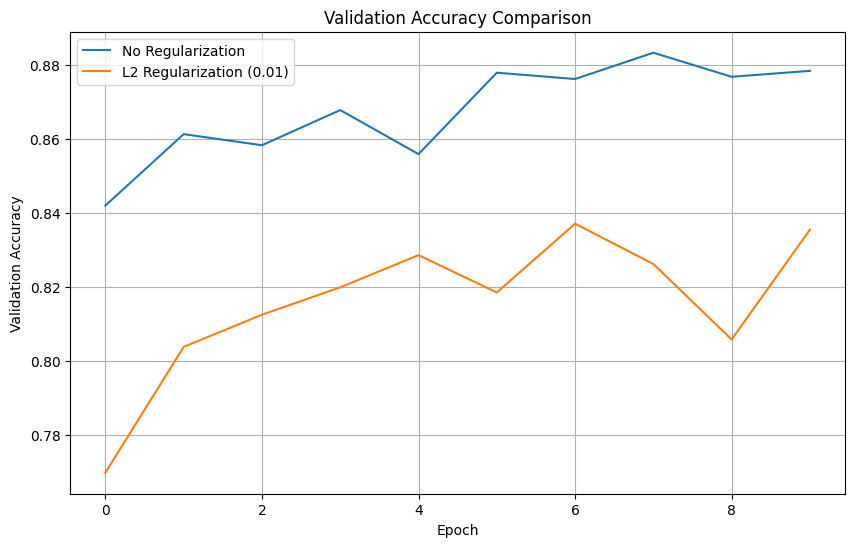

In [7]:
# Step 6: Plot Comparison
plt.figure(figsize=(10, 6))
plt.plot(history_no_reg.history['val_accuracy'], label='No Regularization')
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization (0.01)')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

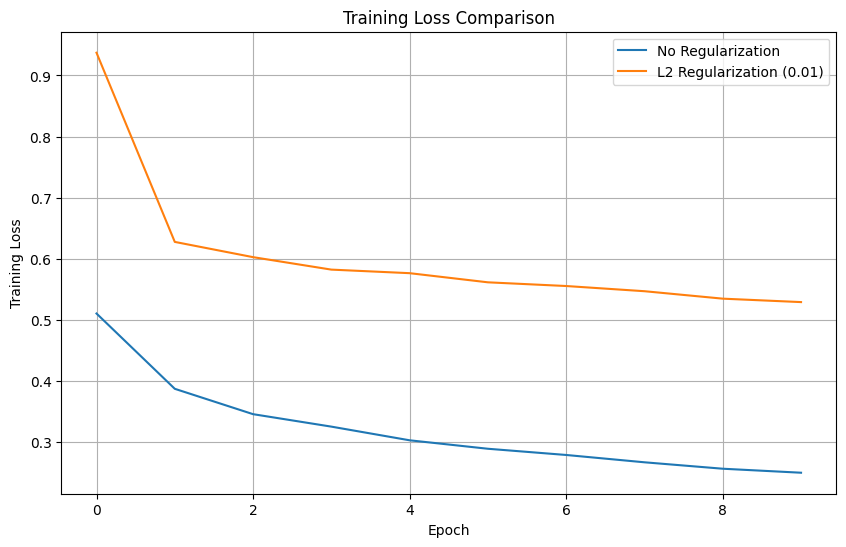

In [9]:
# Step 7: Plot Training Loss Comparison
plt.figure(figsize=(10, 6))
plt.plot(history_no_reg.history['loss'], label='No Regularization')
plt.plot(history_l2.history['loss'], label='L2 Regularization (0.01)')
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# L1 Regularization Example
def build_model_with_l1():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
